# HOMEWORK 1 - 1978793 - DAVIDE MASIERO

## Notebook for the Statistic test Anova 1-way

#### Import some library

In [1]:
import re
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import glob

files = glob.glob("Data/*.txt")
#print files

### Go to parse the Data

In [2]:
df_map = pd.DataFrame() 
df_Rprec = pd.DataFrame()
df_p = pd.DataFrame()
for fi in files:
    m = []
    Rprec = []
    p = []
    f = open(fi, "r")
    #print f
    line = f.readline()
    line = f.readline() 
    for line in f.readlines():
        #print line
        patt = re.compile('[^\t" "\n]+')
        vec = patt.findall(line)
        #print len(vec)
        if (vec[0] == "map") and (vec[1] != "all"):
            m.append(float(vec[2]))
        elif (vec[0] == "Rprec") and (vec[1] != "all"):
            Rprec.append(float(vec[2]))
        elif (vec[0] == "P_10") and (vec[1] != "all"):
            p.append(float(vec[2]))
    df_map[fi[5:-4]] = m
    df_Rprec[fi[5:-4]] = Rprec
    df_p[fi[5:-4]] = p
#print df_map
#print df_Rprec
#print df_p

### Now go to compute the anova 1-way for each DataFrame and plot the boxplot
#### 1) Map

One-way ANOVA - map
F value: 0.26400852977493783
P value: 0.8512741626367035


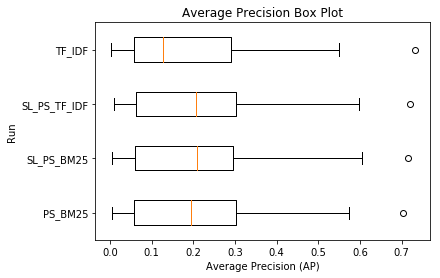

In [3]:
f_m, p_m = stats.f_oneway(df_map['PS_BM25'],
                          df_map['SL_PS_BM25'],
                          df_map['SL_PS_TF_IDF'],
                          df_map['TF_IDF'])
 
print "One-way ANOVA - map"
print "==================="
print "F value:", f_m
print "P value:", p_m

#Create a boxplot
fig1, ax1 = plt.subplots()
data = [df_map['PS_BM25'], df_map['SL_PS_BM25'], df_map['SL_PS_TF_IDF'], df_map['TF_IDF']]
ax1.boxplot(data, vert=False)
ax1.set_title("Average Precision Box Plot")
ax1.set_ylabel("Run")
ax1.set_xlabel("Average Precision (AP)")
ax1.set_yticklabels(["PS_BM25", "SL_PS_BM25", "SL_PS_TF_IDF", "TF_IDF"])
fig1.savefig("Img/BoxPlot_map.png", dpi = 300, bbox_inches='tight')
plt.show()

#### 2) Rprec

One-way ANOVA - Rprec
F value: 0.2845657333375718
P value: 0.8365093578072418


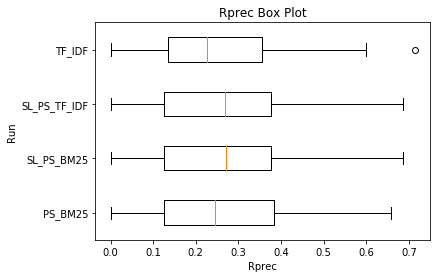

In [4]:
f_Rprec, p_Rprec = stats.f_oneway(df_Rprec['PS_BM25'],
                                  df_Rprec['SL_PS_BM25'],
                                  df_Rprec['SL_PS_TF_IDF'],
                                  df_Rprec['TF_IDF'])
 
print "One-way ANOVA - Rprec"
print "====================="
print "F value:", f_Rprec
print "P value:", p_Rprec

#Create a boxplot
fig2, ax2 = plt.subplots()
data = [df_Rprec['PS_BM25'], df_Rprec['SL_PS_BM25'], df_Rprec['SL_PS_TF_IDF'], df_Rprec['TF_IDF']]
ax2.boxplot(data, vert=False)
ax2.set_title("Rprec Box Plot")
ax2.set_ylabel("Run")
ax2.set_xlabel("Rprec")
ax2.set_yticklabels(["PS_BM25", "SL_PS_BM25", "SL_PS_TF_IDF", "TF_IDF"])
fig2.savefig("Img/BoxPlot_Rprec.png", dpi = 300, bbox_inches='tight')
plt.show()

#### 3) P_10

One-way ANOVA - P_10
F value: 0.3905137728257508
P value: 0.759961565986288


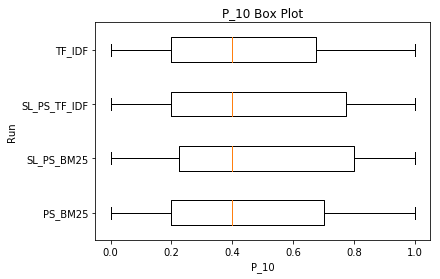

In [5]:
f_p, p_p = stats.f_oneway(df_p['PS_BM25'],
                          df_p['SL_PS_BM25'],
                          df_p['SL_PS_TF_IDF'],
                          df_p['TF_IDF'])
 
print "One-way ANOVA - P_10"
print "===================="
print "F value:", f_p
print "P value:", p_p

#Create a boxplot
fig3, ax3 = plt.subplots()
data = [df_p['PS_BM25'], df_p['SL_PS_BM25'], df_p['SL_PS_TF_IDF'], df_p['TF_IDF']]
ax3.boxplot(data, vert=False)
ax3.set_title("P_10 Box Plot")
ax3.set_ylabel("Run")
ax3.set_xlabel("P_10")
ax3.set_yticklabels(["PS_BM25", "SL_PS_BM25", "SL_PS_TF_IDF", "TF_IDF"])
fig3.savefig("Img/BoxPlot_P_10.png", dpi = 300, bbox_inches='tight')
plt.show()

## Now go to do the comparison between each group

#### 1) Map

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
  PS_BM25     SL_PS_BM25   0.0017  -0.0849 0.0883 False 
  PS_BM25    SL_PS_TF_IDF  0.0014  -0.0851 0.088  False 
  PS_BM25       TF_IDF    -0.0232  -0.1098 0.0634 False 
 SL_PS_BM25  SL_PS_TF_IDF -0.0003  -0.0868 0.0863 False 
 SL_PS_BM25     TF_IDF    -0.0249  -0.1115 0.0617 False 
SL_PS_TF_IDF    TF_IDF    -0.0246  -0.1112 0.062  False 
--------------------------------------------------------


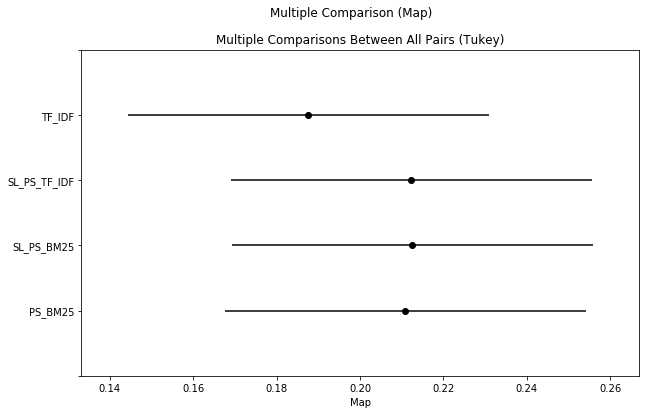

In [6]:
s_map = df_map.stack().reset_index()
s_map = s_map.rename(columns={'level_0': 'id', 'level_1': 'run', 0: 'map'})

mc_map = MultiComparison(s_map['map'], s_map['run'])

# Print the comparisons
print mc_map.tukeyhsd().summary()
fig = mc_map.tukeyhsd().plot_simultaneous(xlabel = "Map")
fig.suptitle("Multiple Comparison (Map)")
fig.savefig("Img/MultiComparison_map.png", dpi = 300)

#### 2) Rprec

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
  PS_BM25     SL_PS_BM25  -0.0034  -0.0858 0.079  False 
  PS_BM25    SL_PS_TF_IDF -0.0015  -0.0839 0.0809 False 
  PS_BM25       TF_IDF    -0.0255  -0.1079 0.0569 False 
 SL_PS_BM25  SL_PS_TF_IDF  0.0019  -0.0805 0.0843 False 
 SL_PS_BM25     TF_IDF     -0.022  -0.1045 0.0604 False 
SL_PS_TF_IDF    TF_IDF     -0.024  -0.1064 0.0584 False 
--------------------------------------------------------


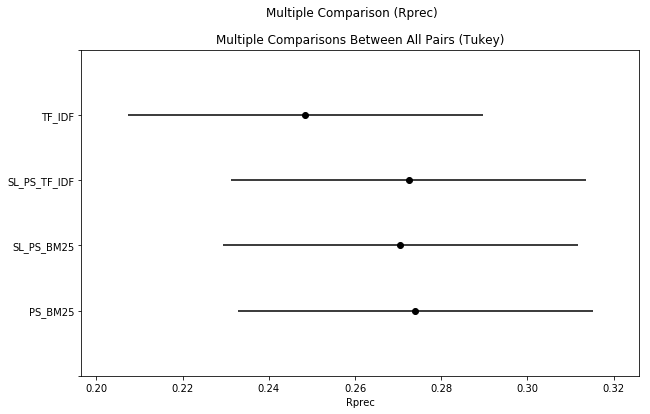

In [7]:
s_Rprec = df_Rprec.stack().reset_index()
s_Rprec = s_Rprec.rename(columns={'level_0': 'id', 'level_1': 'run', 0: 'Rprec'})

mc_Rprec = MultiComparison(s_Rprec['Rprec'], s_Rprec['run'])

# Print the comparisons
print mc_Rprec.tukeyhsd().summary()
fig = mc_Rprec.tukeyhsd().plot_simultaneous(xlabel = "Rprec")
fig.suptitle("Multiple Comparison (Rprec)")
fig.savefig("Img/MultiComparison_Rprec.png", dpi = 300)

#### 3) P_10

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
  PS_BM25     SL_PS_BM25   0.008   -0.1457 0.1617 False 
  PS_BM25    SL_PS_TF_IDF  0.004   -0.1497 0.1577 False 
  PS_BM25       TF_IDF     -0.048  -0.2017 0.1057 False 
 SL_PS_BM25  SL_PS_TF_IDF  -0.004  -0.1577 0.1497 False 
 SL_PS_BM25     TF_IDF     -0.056  -0.2097 0.0977 False 
SL_PS_TF_IDF    TF_IDF     -0.052  -0.2057 0.1017 False 
--------------------------------------------------------


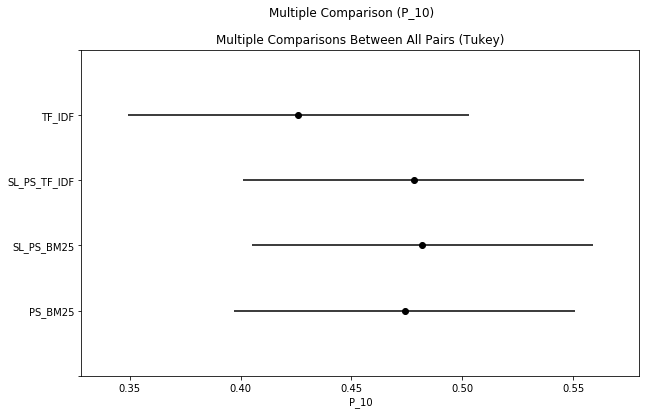

In [8]:
s_p = df_p.stack().reset_index()
s_p = s_p.rename(columns={'level_0': 'id', 'level_1': 'run', 0: 'P_10'})

mc_p = MultiComparison(s_p['P_10'], s_p['run'])

# Print the comparisons
print mc_p.tukeyhsd().summary()
fig = mc_p.tukeyhsd().plot_simultaneous(xlabel = "P_10")
fig.suptitle("Multiple Comparison (P_10)")
fig.savefig("Img/MultiComparison_P_10.png", dpi = 300)